In [5]:
import numpy as np

def sigmoid(z):
    return 1/(1 + np.exp(-z))

class LogisticRegression:

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):

        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features)
        self.bias = 0.0

        for _ in range(self.n_iters):
            linear_prob = np.dot(X, self.weights) + self.bias
            preds = sigmoid(linear_prob)

            dw = (1/n_samples) * np.dot(X.T, (preds - y))
            db = (1/n_samples) * np.sum(preds - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):

        linear_prob = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_prob)
        class_pred = [0 if y<= 0.5 else 1 for y in y_pred]
        return class_pred

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


bc = load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
import pandas as pd

df = pd.DataFrame(bc.data, columns=bc.feature_names)
df['target'] = bc.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [8]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

In [9]:
log_reg = LogisticRegression(lr=0.01)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

C:\Users\User\AppData\Local\Temp\ipykernel_19788\1138191494.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


In [10]:
print(f'Model accuracy is {accuracy(y_pred, y_test)}')

Model accuracy is 0.9473684210526315


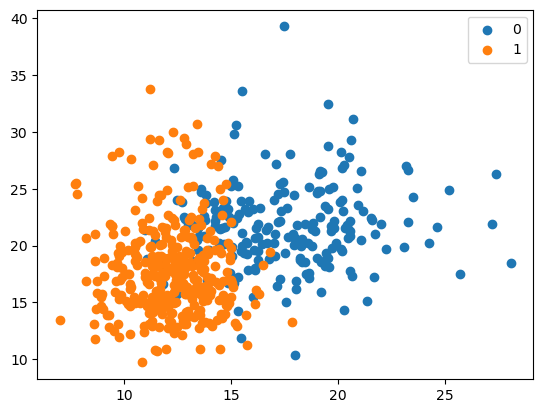

In [11]:
plt.scatter(X[:,0][y==0], X[:,1][y==0], label='0')
plt.scatter(X[:,0][y==1], X[:,1][y==1], label='1')
plt.legend()
plt.show()

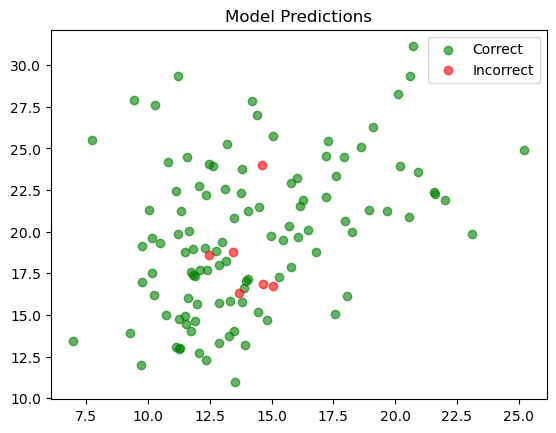

In [12]:
correct = y_test == y_pred
incorrect = ~correct

plt.scatter(X_test[correct, 0], X_test[correct, 1], c='green', label='Correct', alpha=0.6)
plt.scatter(X_test[incorrect, 0], X_test[incorrect, 1], c='red', label='Incorrect', alpha=0.6)

plt.legend()
plt.title('Model Predictions')
plt.show()

In [14]:
from sklearn.metrics import precision_score,recall_score,f1_score

print(f'precision score is: {precision_score(y_test,y_pred)}')
print(f'recall score is: {recall_score(y_test,y_pred)}')
print(f'f1 score is: {f1_score(y_test,y_pred)}')

precision score is: 1.0
recall score is: 0.9154929577464789
f1 score is: 0.9558823529411765


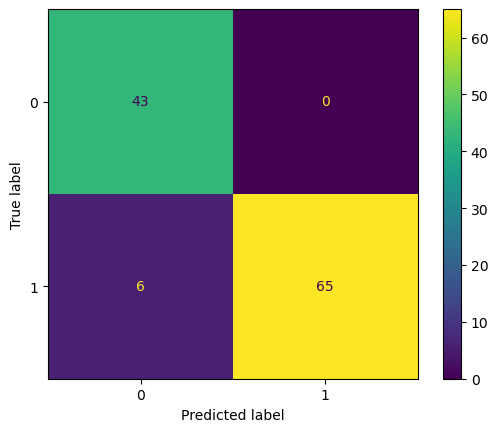

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()
plt.show()